# 0. Import Libraries

In [1]:
from functions.preprocess import *
from functions.save_data import save_data
from functions.sentiment import *
from functions.scrape_tweets import get_token, get_api, get_tweets
from functions.visualize import get_distribution, get_wordcloud

import pandas as pd

import os
import sys
sys.path.append(os.getcwd())

---

# 1. Gathering Data

## 1.1. Connect Twitter

In [2]:
api = get_api(get_token())

✅ Connected


## 1.2. Scrape Twitter

In [3]:
topik = input('What topic are you looking for? ')
num = int(input('How many? '))
tweet_data = get_tweets(api, topik, num)

⏳ Looking for the topic "vaccine" as much as 500 ...
✅ Success, we find 500 data about "vaccine"


## 1.3. Save Data

In [4]:
save_data(tweet_data, topik)

✅ Success


## 1.4. Inspect Data

In [5]:
tweet_data.head()

,date,user,name,text,retweet,favorite,location
0,2021-08-14 23:02:32,CherieannDuarte,Cherie Ann Duarte,@MrPaulBae Watch for those who buy fake vaccin...,0,0,Colorado/Hawaii
1,2021-08-14 23:02:31,stand4sumtin,🇺🇸patriotic cats 🇺🇸arrest seditionists,"@GovRonDeSantis So don’t take the vaccine, tak...",0,0,"Florida, USA"
2,2021-08-14 23:02:29,FanoMabi,Maryline Dorothy,Exemption for vaccine https://t.co/fk6UykfwKO,0,0,"Montréal, Québec, Canada"
3,2021-08-14 23:02:29,Youhavebeenlyin,Char,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...,0,0,
4,2021-08-14 23:02:27,Hanksingler,Hank Single's Banned Ghost,@rustyninetynine @RonFilipkowski To be convinc...,0,0,MA


---

# 2. Preprocess Data

## 2.1. Raw Data

In [6]:
tweet_prep = pd.DataFrame(tweet_data['text'])
tweet_prep.columns = ['tweet']
tweet_prep.head()

,tweet
0,@MrPaulBae Watch for those who buy fake vaccin...
1,"@GovRonDeSantis So don’t take the vaccine, tak..."
2,Exemption for vaccine https://t.co/fk6UykfwKO
3,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...
4,@rustyninetynine @RonFilipkowski To be convinc...


## 2.2. Remove Punctuations

In [7]:
tweet_prep['tweet_puct'] = tweet_prep['tweet'].apply(lambda x: remove_punct(x))
tweet_prep.head()

,tweet,tweet_puct
0,@MrPaulBae Watch for those who buy fake vaccin...,MrPaulBae Watch for those who buy fake vaccine...
1,"@GovRonDeSantis So don’t take the vaccine, tak...",GovRonDeSantis So don’t take the vaccine take ...
2,Exemption for vaccine https://t.co/fk6UykfwKO,Exemption for vaccine
3,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...,Duckyishere jiminsstraykat KJParr PhillyD Deat...
4,@rustyninetynine @RonFilipkowski To be convinc...,rustyninetynine RonFilipkowski To be convinced...


## 2.3. Tokenization

In [8]:
tweet_prep['tweet_token'] = tweet_prep['tweet_puct'].apply(lambda x: tokenization(x.lower()))
tweet_prep.head()

,tweet,tweet_puct,tweet_token
0,@MrPaulBae Watch for those who buy fake vaccin...,MrPaulBae Watch for those who buy fake vaccine...,"[mrpaulbae, watch, for, those, who, buy, fake,..."
1,"@GovRonDeSantis So don’t take the vaccine, tak...",GovRonDeSantis So don’t take the vaccine take ...,"[govrondesantis, so, don, t, take, the, vaccin..."
2,Exemption for vaccine https://t.co/fk6UykfwKO,Exemption for vaccine,"[exemption, for, vaccine, ]"
3,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...,Duckyishere jiminsstraykat KJParr PhillyD Deat...,"[duckyishere, jiminsstraykat, kjparr, phillyd,..."
4,@rustyninetynine @RonFilipkowski To be convinc...,rustyninetynine RonFilipkowski To be convinced...,"[rustyninetynine, ronfilipkowski, to, be, conv..."


## 2.4. Remove Stopwords

In [9]:
tweet_prep['tweet_stwd'] = tweet_prep['tweet_token'].apply(lambda x: remove_stopwords(x))
tweet_prep.head()

,tweet,tweet_puct,tweet_token,tweet_stwd
0,@MrPaulBae Watch for those who buy fake vaccin...,MrPaulBae Watch for those who buy fake vaccine...,"[mrpaulbae, watch, for, those, who, buy, fake,...","[mrpaulbae, watch, for, those, who, buy, fake,..."
1,"@GovRonDeSantis So don’t take the vaccine, tak...",GovRonDeSantis So don’t take the vaccine take ...,"[govrondesantis, so, don, t, take, the, vaccin...","[govrondesantis, so, don, t, take, the, vaccin..."
2,Exemption for vaccine https://t.co/fk6UykfwKO,Exemption for vaccine,"[exemption, for, vaccine, ]","[exemption, for, vaccine, ]"
3,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...,Duckyishere jiminsstraykat KJParr PhillyD Deat...,"[duckyishere, jiminsstraykat, kjparr, phillyd,...","[duckyishere, jiminsstraykat, kjparr, phillyd,..."
4,@rustyninetynine @RonFilipkowski To be convinc...,rustyninetynine RonFilipkowski To be convinced...,"[rustyninetynine, ronfilipkowski, to, be, conv...","[rustyninetynine, ronfilipkowski, to, be, conv..."


## 2.5. Detokenize

In [10]:
tweet_prep['tweet_final'] = tweet_prep['tweet_stwd'].apply(lambda x: detokenization(x))
tweet_prep.head()

,tweet,tweet_puct,tweet_token,tweet_stwd,tweet_final
0,@MrPaulBae Watch for those who buy fake vaccin...,MrPaulBae Watch for those who buy fake vaccine...,"[mrpaulbae, watch, for, those, who, buy, fake,...","[mrpaulbae, watch, for, those, who, buy, fake,...",mrpaulbae watch for those who buy fake vaccine...
1,"@GovRonDeSantis So don’t take the vaccine, tak...",GovRonDeSantis So don’t take the vaccine take ...,"[govrondesantis, so, don, t, take, the, vaccin...","[govrondesantis, so, don, t, take, the, vaccin...",govrondesantis so don t take the vaccine take ...
2,Exemption for vaccine https://t.co/fk6UykfwKO,Exemption for vaccine,"[exemption, for, vaccine, ]","[exemption, for, vaccine, ]",exemption for vaccine
3,@Ducky_ishere @jiminsstraykat @KJParr269 @Phil...,Duckyishere jiminsstraykat KJParr PhillyD Deat...,"[duckyishere, jiminsstraykat, kjparr, phillyd,...","[duckyishere, jiminsstraykat, kjparr, phillyd,...",duckyishere jiminsstraykat kjparr phillyd deat...
4,@rustyninetynine @RonFilipkowski To be convinc...,rustyninetynine RonFilipkowski To be convinced...,"[rustyninetynine, ronfilipkowski, to, be, conv...","[rustyninetynine, ronfilipkowski, to, be, conv...",rustyninetynine ronfilipkowski to be convinced...


---

# 3. EDA

## 3.1. Distribution

In [11]:
get_distribution(tweet_data)

## 3.2. Word Cloud

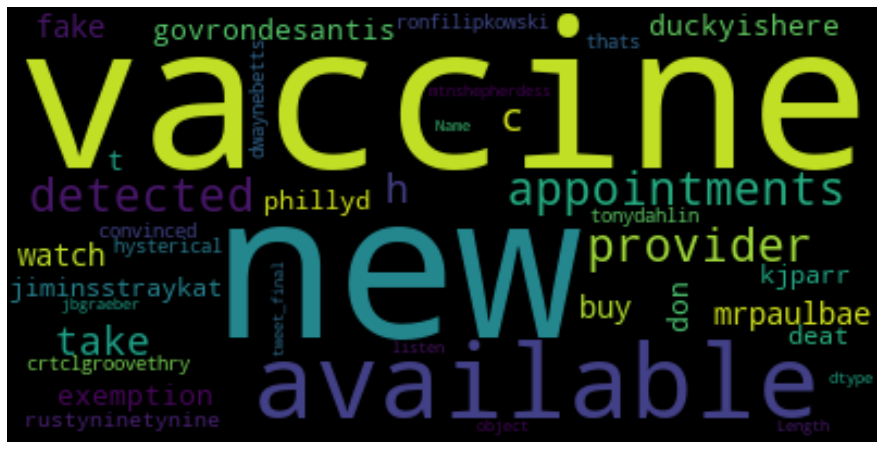

In [12]:
get_wordcloud(tweet_prep, "tweet_final")

---

# 4. Analysis Sentiment

## 4.1. Comparison

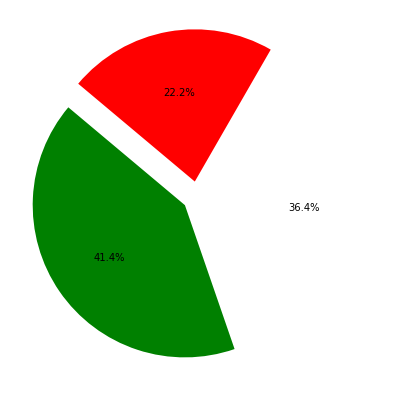

In [13]:
pos_tweets, neu_tweets, neg_tweets = get_sentiment(tweet_prep, "tweet_final")

## 4.2. Inspect Some Tweet

In [14]:
get_tweets_sentimen(pos_tweets, neu_tweets, neg_tweets)


🟢 Positive 
fiorellaim pasti pada titik ini antifa adalah semua pegawai pemerintah kan maksud saya anjing vaksin percobaan paksa ini 

⚪ Neutral 
percaya hebobiwine jika dia tidak tahu bahwa ini adalah waktu untuk membeli vaksin yang cukup untuk memvaksinasi ugandans dia sp 

🔴 Negative 
blog paulnewlandto apa efek samping jangka panjangnya menjawab ini dan saya tidak akan mendapatkan vaksin saya
